# GRIP:-The Spark Foundation

# Project_Task_02

# Aurthor:-Sandeep Khandelwal

# predict the optimum number of clusters and represent it visually.

# Prediction Using UnSupervised Machine Learning  

In [38]:
#Importing Important Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#Reading the dataset 

df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.shape

(150, 6)

In [41]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [42]:
#Converting cattogorical column to binary format
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df['Species']=pd.DataFrame(lb.fit_transform(df['Species']))

In [43]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [44]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [45]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [47]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [48]:
df[df.duplicated()].sum()

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

# Using K-Means

In [49]:
# importing important libraries for K means

from sklearn.cluster import KMeans


In [50]:
#Normalization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_Df_df=scaler.fit_transform(df.iloc[:,1:])


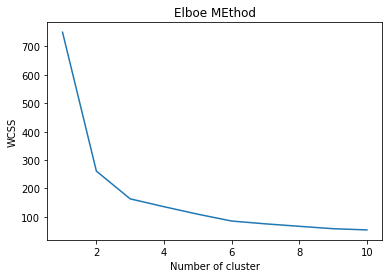

In [51]:
#Finding numbers of K-Clusters
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Df_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elboe MEthod')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

This method is called is 'Elblow Method'.
This is when Within Clusters sum of square {WCSS}  doesn't decrease significant with the iteration.

In [75]:
from sklearn.cluster import KMeans
clusters_new=KMeans(3,random_state=42)
k2=clusters_new.fit(scaled_Df_df)

In [76]:
k2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [77]:
df['clusterid_new']=k2.labels_

In [78]:
clusters_new.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862, -1.22474487],
       [ 1.08805236, -0.02434762,  1.0396699 ,  1.09640835,  1.14487021],
       [ 0.01256556, -0.75917314,  0.32257597,  0.22817864,  0.15876322]])

In [79]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusterid_new
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0


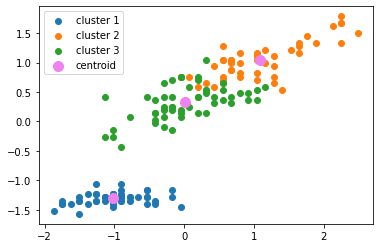

In [82]:
#Visualising the clusters

#plotting the first cluster
plt.scatter(scaled_Df_df[k2.labels_==0,0],scaled_Df_df[k2.labels_==0,2],label='cluster 1')

#plotting the Second cluster
plt.scatter(scaled_Df_df[k2.labels_==1,0],scaled_Df_df[k2.labels_==1,2],label='cluster 2')

#plotting the Third cluster
plt.scatter(scaled_Df_df[k2.labels_==2,0],scaled_Df_df[k2.labels_==2,2],label='cluster 3')


plt.scatter(clusters_new.cluster_centers_[:,0],clusters_new.cluster_centers_[:,2],
           s=100,c='violet',label='centroid')
plt.legend()

In [20]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,,mean,mean,mean,mean,mean,mean
0,0,74.064516,6.170968,2.964516,4.503226,1.429032,1.000000
1,1,25.163265,5.016327,3.440816,1.467347,0.242857,0.000000
2,2,79.454545,5.495455,2.436364,3.827273,1.159091,1.045455
3,3,126.000000,6.635417,3.000000,5.585417,2.043750,2.000000


# Using Hierarical CLustering

In [21]:
#importing important libraries

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [22]:
# Normalization
    
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)    

In [23]:
df_norm=norm_func(df.iloc[:,1:])


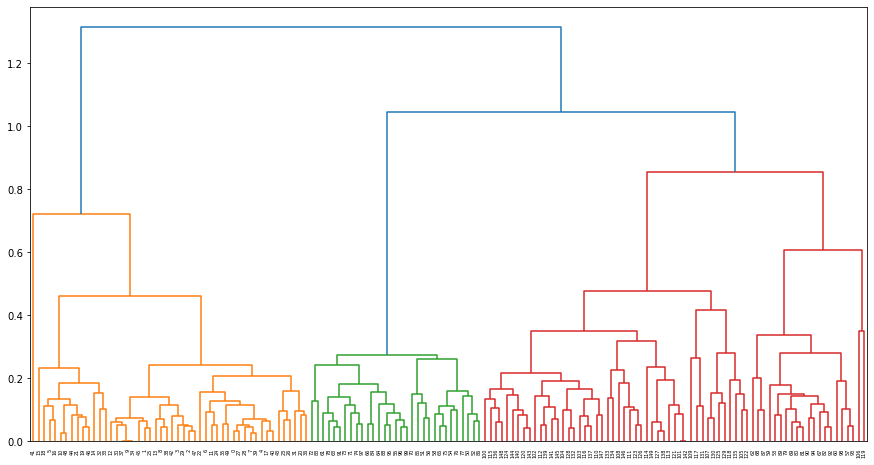

In [24]:
##Dendrogram using weigthted method
plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='weighted'))

In [25]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage="complete")

In [26]:
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [27]:
df_norm['h_clusterid']=hc.labels_

In [28]:
df_norm

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusterid_new,h_clusterid
0,0.222222,0.625000,0.067797,0.041667,0.0,0.333333,0
1,0.166667,0.416667,0.067797,0.041667,0.0,0.333333,0
2,0.111111,0.500000,0.050847,0.041667,0.0,0.333333,0
3,0.083333,0.458333,0.084746,0.041667,0.0,0.333333,0
4,0.194444,0.666667,0.067797,0.041667,0.0,0.333333,0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0,1.000000,2
146,0.555556,0.208333,0.677966,0.750000,1.0,1.000000,2
147,0.611111,0.416667,0.711864,0.791667,1.0,1.000000,2
148,0.527778,0.583333,0.745763,0.916667,1.0,1.000000,2
